In [1143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

training  = pd.read_csv('training.csv', sep=';')
training


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Unnamed: 7
0,25,130,80.0,15.0,98,86,high risk,NaN
1,35,140,90.0,13.0,98,70,high risk,NaN
2,29,90,70.0,8.0,100,80,high risk,NaN
3,30,140,85.0,7.0,98,70,high risk,NaN
4,35,120,60.0,61.0,98,76,low risk,NaN
...,...,...,...,...,...,...,...,...
1009,22,120,60.0,15.0,98,80,high risk,NaN
1010,55,120,90.0,18.0,98,60,high risk,NaN
1011,35,85,60.0,19.0,98,86,high risk,NaN
1012,43,120,90.0,18.0,98,70,high risk,NaN


Notiamo la presenza di una colonna aggiuntiva Unnamed:7

#Controlliamo che tutte le colonne abbiano la stessa lunghezza

In [1144]:
#column= ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate','RiskLevel']
#for columns in column:
    #print(len(training[column]))

Controlliamo il numero di valori NaN presenti nella colonna 'Unnamed: 7'

In [1145]:
training["Unnamed: 7"].isnull().values.sum()

1013

In [1146]:
not_null_row = training["Unnamed: 7"].dropna(how='all')
not_null_row

1006    high risk
Name: Unnamed: 7, dtype: object

In [1147]:
training.iloc[1006]

Age                   17
SystolicBP            85
DiastolicBP         60.0
BS                  63.0
BodyTemp             102
HeartRate             86
RiskLevel              1
Unnamed: 7     high risk
Name: 1006, dtype: object

Notiamo che il valore RiskLevel non è nella posizione corretta a causa di un errore di formattazione

In [1148]:
training.at[1006, 'RiskLevel'] = training.loc[1006, 'Unnamed: 7']
training.iloc[1006]

Age                   17
SystolicBP            85
DiastolicBP         60.0
BS                  63.0
BodyTemp             102
HeartRate             86
RiskLevel      high risk
Unnamed: 7     high risk
Name: 1006, dtype: object

Pertanto possiamo eliminare la colonna Unnamed:7

In [1149]:
training.drop(columns=['Unnamed: 7'], inplace=True)
training

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80.0,15.0,98,86,high risk
1,35,140,90.0,13.0,98,70,high risk
2,29,90,70.0,8.0,100,80,high risk
3,30,140,85.0,7.0,98,70,high risk
4,35,120,60.0,61.0,98,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60.0,15.0,98,80,high risk
1010,55,120,90.0,18.0,98,60,high risk
1011,35,85,60.0,19.0,98,86,high risk
1012,43,120,90.0,18.0,98,70,high risk


In [1150]:
training.describe()

,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1013.000000,1013.000000,1014.000000,1014.000000
mean,113.198225,76.466930,59.437315,101.584813,77.185404
std,18.403913,13.891169,83.911416,49.068944,92.233197
min,70.000000,49.000000,6.000000,98.000000,7.000000
25%,100.000000,65.000000,15.000000,98.000000,70.000000
50%,120.000000,80.000000,68.000000,98.000000,76.000000
75%,120.000000,90.000000,75.000000,98.000000,80.000000
max,160.000000,100.000000,701.000000,986.000000,3000.000000


dalla sintesi statistica notiamo alcune anomalie:
-non compare la colonna 'Age', forse per la presenza di una stringa nella colonna 
-il count delle colonne 'DiastolicBP' e 'BS' è 1013, invece di 1014 
-valori anomali per quanto riguarda le colonne 'BS', 'BodyTemp', 'HeartRate'

Vediamo i valori nulli nel dataset

In [1151]:
training.isnull().any()

Age            False
SystolicBP     False
DiastolicBP     True
BS              True
BodyTemp       False
HeartRate      False
RiskLevel      False
dtype: bool

Controlliamo quali sono le righe con valore nullo

In [1152]:
training[training.isnull().any(axis=1)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
387,31,120,60.0,NaN,98,76,low risk
877,27,120,NaN,68.0,98,77,low risk


Ci assicuriamo che non siano presenti delle stringhe oltre che valori numerici sulla colonna 'age', quindi trasformiamo i valori non numerici in NaN

In [1153]:
training['Age'] = pd.to_numeric(training['Age'], errors='coerce')
training[training.isnull().any(axis=1)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
387,31.0,120,60.0,NaN,98,76,low risk
820,NaN,115,60.0,75.0,101,86,mid risk
877,27.0,120,NaN,68.0,98,77,low risk


Eliminiamo la riga 820 (controllando nel dataset si vede che ha valore "?" )

In [1154]:
training=training.drop(index=820)

In [1155]:
training[(training['Age'] > 100 ) | (training['Age'] < 0)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
50,250.0,120,80.0,7.0,98,66,low risk
247,-1009.0,100,85.0,69.0,98,70,low risk
1013,159.0,120,65.0,6.0,101,76,mid risk


Eliminiamo le righe inconsistenti e facciamo il reset degli index 

In [1156]:
training=training.drop(index=[50,247,1013])
training = training.reset_index(drop=True)
training


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,15.0,98,86,high risk
1,35.0,140,90.0,13.0,98,70,high risk
2,29.0,90,70.0,8.0,100,80,high risk
3,30.0,140,85.0,7.0,98,70,high risk
4,35.0,120,60.0,61.0,98,76,low risk
...,...,...,...,...,...,...,...
1005,48.0,120,80.0,11.0,98,88,high risk
1006,22.0,120,60.0,15.0,98,80,high risk
1007,55.0,120,90.0,18.0,98,60,high risk
1008,35.0,85,60.0,19.0,98,86,high risk


Facciamo la stessa verifica con le altre colonne (non serve perche dal describe() si vede che i parametri statistici vengono calcolati per tutte le colonne, tranne per 'Age', quindi tutte le altre hanno valori numerici o al più valori nulli)

In [1157]:
#colonne_non_numeriche=['SystolicBP', 'DiastolicBP', 'BS','BodyTemp', 'HeartRate']
#training[colonne_non_numeriche] = training[colonne_non_numeriche].apply(pd.to_numeric, errors='coerce')
#training

In [1158]:
training[training.isnull().any(axis=1)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
385,31.0,120,60.0,NaN,98,76,low risk
874,27.0,120,NaN,68.0,98,77,low risk


Possiamo sostituire i valori NaN per BS e DiastolicBP con la relativa media. Inoltre controlliamo che in ogni colonna non ci siano righe con valori anomali.

In [1159]:
mean = training.describe().loc['mean']
mean

Age             29.885149
SystolicBP     113.196040
DiastolicBP     76.482656
BS              59.517344
BodyTemp       101.593069
HeartRate       77.196040
Name: mean, dtype: float64

In [1160]:
training[(training['SystolicBP'] > 160 ) | (training['SystolicBP'] < 70)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [1161]:
training[(training['DiastolicBP'] > 100) | (training['DiastolicBP'] < 40)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [1162]:
training['DiastolicBP'] = training['DiastolicBP'].fillna(76.0)

<Axes: >

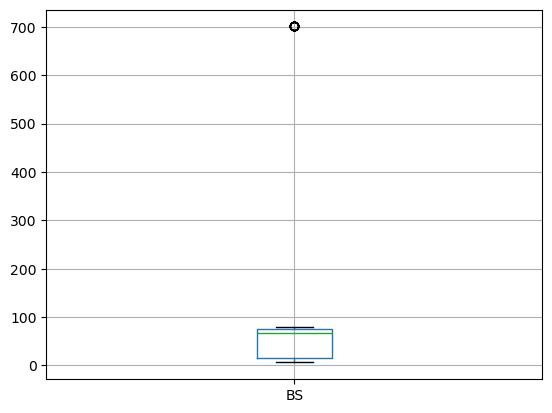

In [1163]:
training.boxplot('BS')

In [1164]:
training[(training['BS'] > 200) | (training['BS'] <40 )] #vanno tolti anche i valori <70???? 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,15.0,98,86,high risk
1,35.0,140,90.0,13.0,98,70,high risk
2,29.0,90,70.0,8.0,100,80,high risk
3,30.0,140,85.0,7.0,98,70,high risk
5,23.0,140,80.0,701.0,98,70,high risk
...,...,...,...,...,...,...,...
1005,48.0,120,80.0,11.0,98,88,high risk
1006,22.0,120,60.0,15.0,98,80,high risk
1007,55.0,120,90.0,18.0,98,60,high risk
1008,35.0,85,60.0,19.0,98,86,high risk


Per la colonna BS si hanno alcuni valori inconsistenti. Cambiamo questi valori con NaN e sostituiamoli successivamente con la media 

In [1165]:
training['BS'] = training['BS'].apply(lambda x: np.nan if x >200 or x <40 else x)

Nella colonna BS ora abbiamo valori NaN nei vecchi valori incosistenti


In [1166]:
training[training.isnull().any(axis=1)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,NaN,98,86,high risk
1,35.0,140,90.0,NaN,98,70,high risk
2,29.0,90,70.0,NaN,100,80,high risk
3,30.0,140,85.0,NaN,98,70,high risk
5,23.0,140,80.0,NaN,98,70,high risk
...,...,...,...,...,...,...,...
1005,48.0,120,80.0,NaN,98,88,high risk
1006,22.0,120,60.0,NaN,98,80,high risk
1007,55.0,120,90.0,NaN,98,60,high risk
1008,35.0,85,60.0,NaN,98,86,high risk


Calcoliamo la media attuale, cioè con i valori incosistenti esclusi. Sostituiamo i valori NaN con la media

In [1167]:
training['BS'].mean()


71.66666666666667

In [1168]:
training['BS'] = training['BS'].fillna(72.0)

Controlliamo che la modifica sia avvenuta con successo

In [1169]:
training.iloc[1009]

Age                 43.0
SystolicBP           120
DiastolicBP         90.0
BS                  72.0
BodyTemp              98
HeartRate             70
RiskLevel      high risk
Name: 1009, dtype: object

<Axes: >

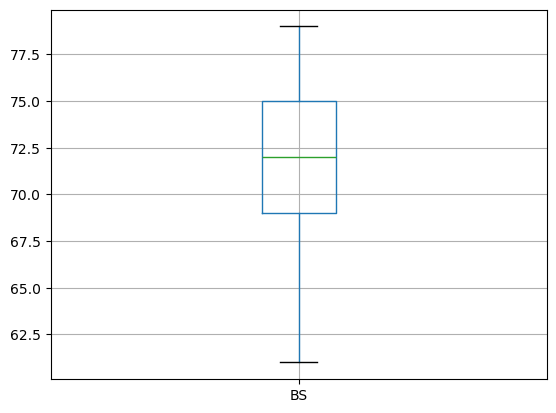

In [1170]:
training.boxplot('BS')

facciamo un controllo sulla colonna 'BodyTemp'

In [1171]:
training[(training['BodyTemp'] > 105) | (training['BodyTemp'] < 50)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
130,32.0,140,90.0,72.0,400,88,high risk
637,19.0,120,60.0,72.0,984,70,low risk
642,25.0,140,100.0,72.0,986,70,high risk
691,19.0,120,60.0,72.0,984,70,low risk


In [1172]:
training.loc[[130,637], 'BodyTemp'] = 101
training.loc[[642,691], 'BodyTemp'] = 102
training.iloc[[130,637,642,691]]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
130,32.0,140,90.0,72.0,101,88,high risk
637,19.0,120,60.0,72.0,101,70,low risk
642,25.0,140,100.0,72.0,102,70,high risk
691,19.0,120,60.0,72.0,102,70,low risk


facciamo un controllo sulla colonna 'HeartRate'

In [1173]:
training[(training['HeartRate'] > 200) | (training['HeartRate'] < 30)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
68,32.0,120,65.0,72.0,101,3000,mid risk
497,16.0,120,75.0,79.0,98,7,low risk
905,16.0,120,75.0,79.0,98,7,low risk


In [1174]:
training['HeartRate'] = training['HeartRate'].apply(lambda x: np.nan if x >200 or x < 30 else x)

Verifichiamo che i valori siano stati sotituiti con NaN

In [1175]:
training[training.isnull().any(axis=1)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
68,32.0,120,65.0,72.0,101,NaN,mid risk
497,16.0,120,75.0,79.0,98,NaN,low risk
905,16.0,120,75.0,79.0,98,NaN,low risk


Calcoliamo la nuova media

In [1176]:
training['HeartRate'].mean()

74.43296921549155

Inseriamo il valore della media

In [1177]:
training.loc[[68,497,905], 'HeartRate'] = 74.0
training.iloc[[68,497,905]]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
68,32.0,120,65.0,72.0,101,74.0,mid risk
497,16.0,120,75.0,79.0,98,74.0,low risk
905,16.0,120,75.0,79.0,98,74.0,low risk


In [1178]:
valori_risklevel=['high risk', 'mid risk', 'low risk']
training[~training['RiskLevel'].isin(valori_risklevel)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
653,48.0,120,80.0,72.0,98,88.0,?


Eliminiamo quindi la riga 653, e facciamo il reset index

In [1179]:
training=training.drop(index=653)
training = training.reset_index(drop=True)
training

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,72.0,98,86.0,high risk
1,35.0,140,90.0,72.0,98,70.0,high risk
2,29.0,90,70.0,72.0,100,80.0,high risk
3,30.0,140,85.0,72.0,98,70.0,high risk
4,35.0,120,60.0,61.0,98,76.0,low risk
...,...,...,...,...,...,...,...
1004,48.0,120,80.0,72.0,98,88.0,high risk
1005,22.0,120,60.0,72.0,98,80.0,high risk
1006,55.0,120,90.0,72.0,98,60.0,high risk
1007,35.0,85,60.0,72.0,98,86.0,high risk


In [1180]:
training.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,29.867195,113.189296,76.478692,71.790882,98.674926,74.418236
std,13.491627,18.440995,13.900860,4.127299,1.382062,7.505785
min,10.000000,70.000000,49.000000,61.000000,98.000000,60.000000
25%,19.000000,100.000000,65.000000,69.000000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,72.000000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,75.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,79.000000,103.000000,90.000000
